PYTHON - twitter handles for my 4 users: 
1. @CP3
2. @warriors
3. @StephenCurry30
4. @TheTraeYoung

> First I need to find their `userids` then I can find their `followers`. 
> 1. `get_userid()` based on username
> 2. `get_following()` based on userid

In [335]:
consumer_key = "xxx"
consumer_secret = "xxx"
access_token = "xxx"
access_token_secret = "xxx"
bearer_token = "xxx"

In [336]:
class BearerAuth(requests.auth.AuthBase):
    def __init__(self, token):
        self.token = token
    def __call__(self, r):
        r.headers["authorization"] = "Bearer " + self.token
        return r

In [337]:
from requests import get
import pandas as pd

In [338]:
# Get the userid based on username
def get_userid(list_usernames):
    users = {}
    for username in list_usernames:
        url_username =  f"https://api.twitter.com/2/users/by/username/{username}"
        response = get(url_username, auth = BearerAuth(bearer_token))
        print(url_username)
        users[username] = response.json().get('data').get('id')
    print(users)
    return users

In [339]:
users = get_userid(['warriors', 'StephenCurry30', 'TheTraeYoung', 'CP3'])

https://api.twitter.com/2/users/by/username/warriors
https://api.twitter.com/2/users/by/username/StephenCurry30
https://api.twitter.com/2/users/by/username/TheTraeYoung
https://api.twitter.com/2/users/by/username/CP3
{'warriors': '26270913', 'StephenCurry30': '42562446', 'TheTraeYoung': '2842841126', 'CP3': '53853197'}


Now I will be getting the followers of my 4 users:
1. warriors
2. StephenCurry30
3. TheTraeYoung
4. CP3

In [340]:
def get_following(userid):
    next_token = None
    
    url_following = f"https://api.twitter.com/2/users/{userid}/following"
    response = get(url_following, auth = BearerAuth(bearer_token))
    print(response)
    next_token = response.json().get('meta').get('next_token')
#    print(pd.DataFrame(response.json().get('data')))
    following= list(pd.DataFrame(response.json().get('data')).username)
#    print(following)
#    print(pd.DataFrame(response.json().get('data')).username)
#    print(len(following))
    return next_token, following

In [341]:
def get_following_pagination(userid, next_token, following_data):
    print(next_token)
    data = following_data
    url_following = f"https://api.twitter.com/2/users/{userid}/following?pagination_token={next_token}"
    response = get(url_following, auth = BearerAuth(bearer_token))
    data.extend(list(pd.DataFrame(response.json().get('data')).username))
    print(response)
   # input()
    try:
        next_token = response.json().get('meta').get('next_token')
        get_following_pagination(userid, next_token, following_data)

    except:
        pass
    
    return data

In [342]:
def user_followers(userid):
    next_token, following_data = get_following(userid)
    all_following = get_following_pagination(userid, next_token, following_data)
    return all_following

In [328]:
# def user_followers(users):
#     twitter_data = {}
#     for key_username, key_userid in users.items(): 
#         print(key_username)
#         print(key_userid)
#         next_token, following_data = get_following(key_username, key_userid)
#         print(following_data)
#         all_following = get_following_pagination(key_username, key_userid, next_token, following_data)
#         twitter_data[key] = all_following
#         print(len(twitter_data))
#     return twitter_data

#twitter_data = user_followers(users)

In [343]:
warriors = user_followers('26270913')
len(warriors)

<Response [200]>
UKFT48K0JUVHAZZZ
<Response [200]>
CLB6T81S4KCHAZZZ
<Response [200]>
86IPTCU9FV2H8ZZZ
<Response [200]>
B2CQDFU8OAH18ZZZ
<Response [200]>
MADMJL4EV2018ZZZ
<Response [200]>
TV8TN5AUR95H8ZZZ
<Response [200]>
G7N897CBH4IH8ZZZ
<Response [200]>
0U1UM74SH3816ZZZ
<Response [200]>
PBN1EMR8D1KH4ZZZ
<Response [200]>
None


916

In [347]:
StephenCurry30 = user_followers('42562446')
len(StephenCurry30)

<Response [200]>
TIV5DROV0CG1EZZZ
<Response [200]>
F5J5TO08J7F1AZZZ
<Response [200]>
6M38IQ712KEHAZZZ
<Response [200]>
MM58EBVDCPLH8ZZZ
<Response [200]>
FDUUCEINHJ1H6ZZZ
<Response [200]>
U16RBCS8QTB16ZZZ
<Response [200]>
HUGV3CTEUS116ZZZ
<Response [200]>
LUEEQ8B5L1GH4ZZZ
<Response [200]>
None


839

In [348]:
TheTraeYoung = user_followers('2842841126')
len(TheTraeYoung)

<Response [200]>
622GSOTV387HCZZZ
<Response [200]>
None


121

In [378]:
CP3 = user_followers('53853197')
len(CP3)

<Response [200]>
OE64O2070IBHCZZZ
<Response [200]>
O3AUD9N9ISMH8ZZZ
<Response [200]>
V20CV5RR6ER16ZZZ
<Response [200]>
C03ANNT9H5P16ZZZ
<Response [200]>
RB260D1Q40L16ZZZ
<Response [200]>
E85NA2V9S7P14ZZZ
<Response [200]>
0EOMUKIOK2O14ZZZ
<Response [200]>
C13IJCQGOTJ14ZZZ
<Response [200]>
5D29LV94GOL14ZZZ
<Response [200]>
None


930

In [526]:
user_warriors = ['warriors'] * len(warriors)
warriors_df = pd.DataFrame(list(zip(user_warriors, warriors)), columns = ['username', 'following'])
warriors_df.head(5)

,username,following
0,warriors,Mayzin
1,warriors,goldenstateent
2,warriors,p_lo
3,warriors,DWRIGHTWAY1
4,warriors,BamBam1A


In [527]:
user_StephenCurry30 = ['StephenCurry30'] * len(StephenCurry30)
sc30_df = pd.DataFrame(list(zip(user_StephenCurry30, StephenCurry30)), columns = ['username', 'following'])
sc30_df.head(5)

,username,following
0,StephenCurry30,antonin_org
1,StephenCurry30,June79NYC
2,StephenCurry30,TELFARGLOBAL
3,StephenCurry30,Beast_TM
4,StephenCurry30,WhenWeAllVote


In [528]:
user_TheTraeYoung = ['TheTraeYoung'] * len(TheTraeYoung)
icetrae_df = pd.DataFrame(list(zip(user_TheTraeYoung, TheTraeYoung)), columns = ['username', 'following'])
icetrae_df.head(5)

,username,following
0,TheTraeYoung,KingJames
1,TheTraeYoung,jackharlow
2,TheTraeYoung,TheCircuit
3,TheTraeYoung,BradyManek
4,TheTraeYoung,CoachVenables


In [529]:
user_CP3 = ['CP3'] * len(CP3)
CP3_df = pd.DataFrame(list(zip(user_CP3, CP3)), columns = ['username', 'following'])
CP3_df.head(5)

,username,following
0,CP3,greenfly
1,CP3,rajasthanroyals
2,CP3,MoveInsoles
3,CP3,ttremaglioNBPA
4,CP3,UNCF


> Creating a combined pandas dataframe for all the users. Then filter out any following usernames where count is less than 1. 

In [530]:
df = warriors_df.append(sc30_df)
df = df.append(icetrae_df)
df = df.append(CP3_df)
df

,username,following
0,warriors,Mayzin
1,warriors,goldenstateent
2,warriors,p_lo
3,warriors,DWRIGHTWAY1
4,warriors,BamBam1A
...,...,...
925,CP3,CoachJon8
926,CP3,RasualButler45
927,CP3,cjpaul14
928,CP3,DwyaneWade


In [603]:
temp = df.groupby(['following']).count()
temp = temp[temp['username'] <= 2].reset_index()['following']
temp

0         0goudelock
1           0ne0f0ne
2             10EL21
3          1996Biggs
4        1MikeHughes
            ...     
2385    yungsmoove21
2386      zaccurry30
2387          zaza27
2388          zlurie
2389          zteusa
Name: following, Length: 2390, dtype: object

In [604]:
data = df[~df['following'].isin(temp)]

In [605]:
data

,username,following
3,warriors,DWRIGHTWAY1
14,warriors,andre
25,warriors,JLin7
35,warriors,DaTrillStak5
59,warriors,heydb
...,...,...
876,CP3,TheJetOnTNT
882,CP3,SteveNash
890,CP3,BaronDavis
912,CP3,StephenCurry30


***

### Undirected Graph 

In [606]:
import networkx as nx
import networkx.algorithms.tree as tree
from networkx.generators.random_graphs import erdos_renyi_graph
import matplotlib.pyplot as plt

In [607]:
data['Graph_Nodes'] = list(zip(data.username, data.following))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


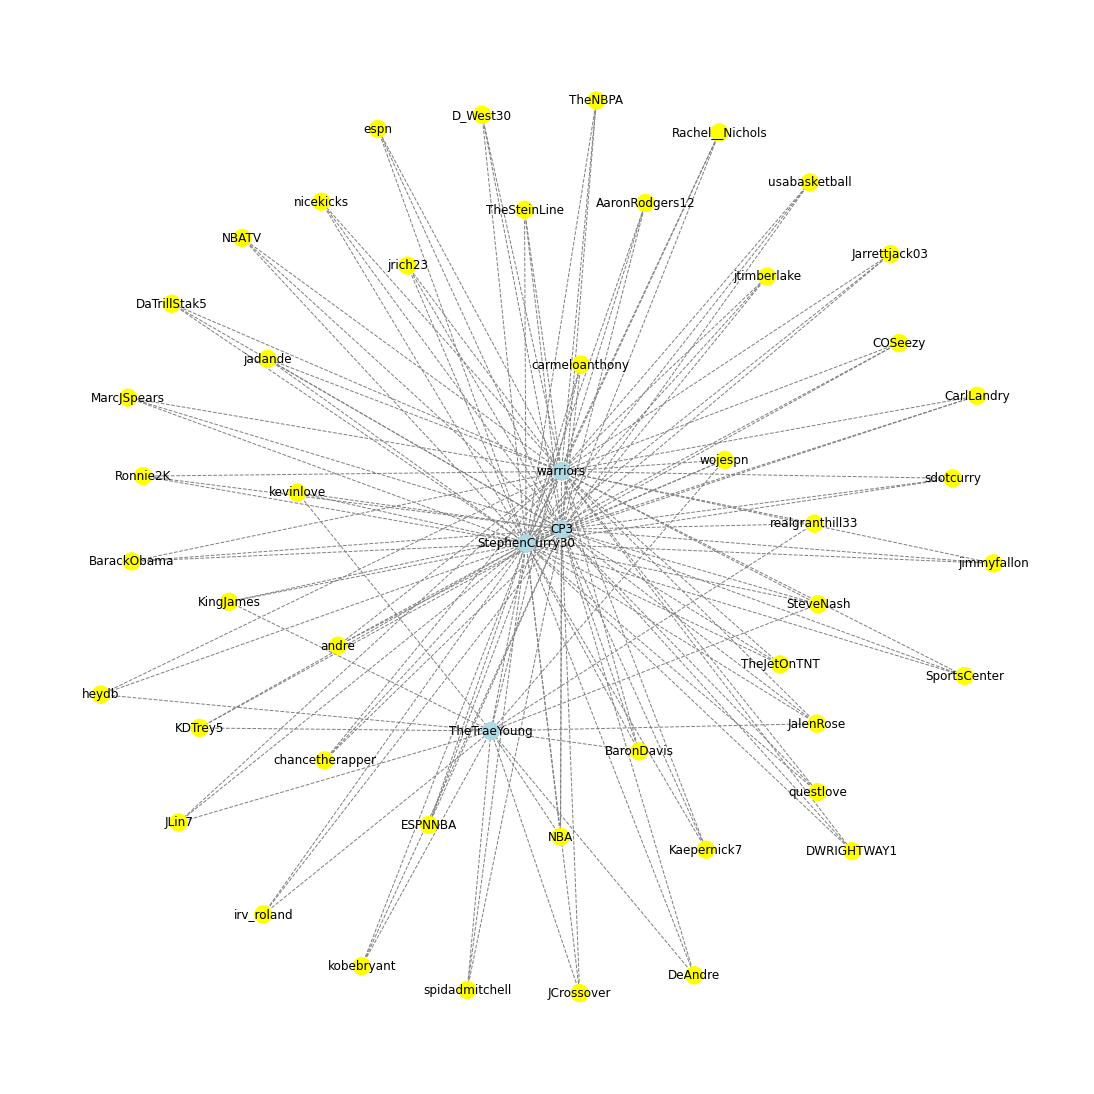

In [608]:
plt.figure(3,figsize=(15,15)) 

G = nx.Graph()

elist = list(data['Graph_Nodes'])
# [:warriors_len]
# elist_StephenCurry = list(data['Graph_Nodes'])[:StephenCurry_len]
#elist_warriors = list(data['Graph_Nodes'])[:warriors_len]
#elist_warriors = list(data['Graph_Nodes'])[:warriors_len]

G.add_edges_from(elist)
#G.add_edges_from(elist_StephenCurry)

color_map = []
for node in G:
    if node in ['warriors','StephenCurry30', 'TheTraeYoung', 'CP3']:
        color_map.append('lightblue')
    else: 
        color_map.append('yellow') 

pos = nx.spring_layout(G, k=0.15, iterations=20)
#.extends(['lightblue'])
#print(len(node_colors))
nx.draw(G,pos, with_labels = True, node_color = color_map, edge_color = 'grey', style = 'dashed')




### Directed Graph

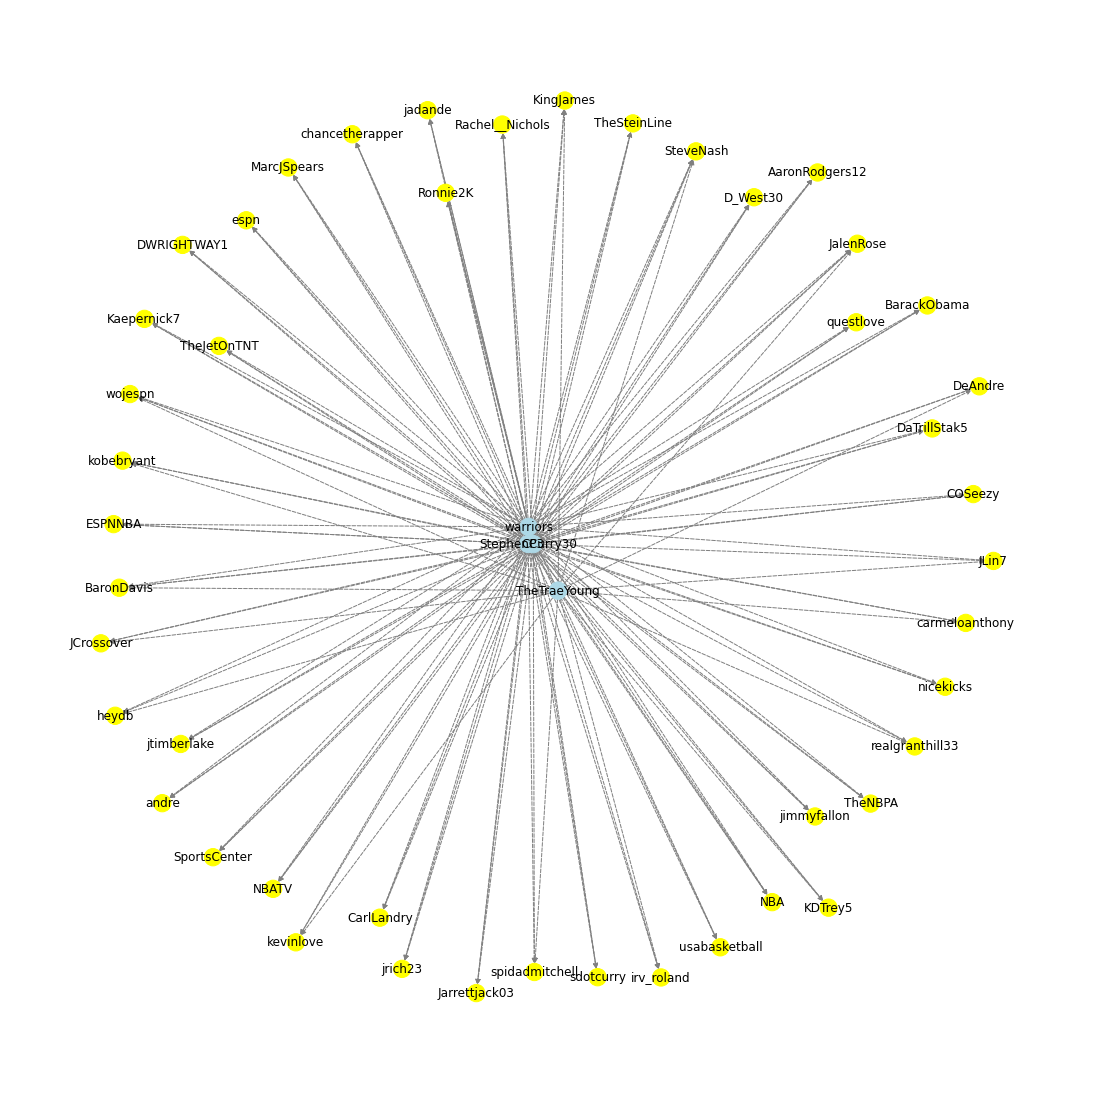

In [612]:
plt.figure(3,figsize=(15,15)) 

GD = nx.DiGraph()
GD.add_edges_from(elist)
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(GD, pos, with_labels = True, node_color = color_map, edge_color = 'grey', style = 'dashed')

#nx.draw(G, with_labels = True, node_color = color_map, edge_color = 'grey', style = 'dashed')


In [610]:
# WSJ --- ATLHawks
#eatlearnplay --- MichelleObama

In [621]:
shortest_path_wsj_hawks = nx.dijkstra_path_length(G, 'jimmyfallon', 'BarackObama')
print(nx.dijkstra_path(G, 'jimmyfallon', 'BarackObama'))
print("The shortest path between jimmyfallon (Jimmy Fallon) and BarackObama (Barack Obama), using the Dijkstra algorithm, is " + str(shortest_path_wsj_hawks) + " hops.")

['jimmyfallon', 'warriors', 'BarackObama']
The shortest path between jimmyfallon (Jimmy Fallon) and BarackObama (Barack Obama), using the Dijkstra algorithm, is 2 hops.


***Undirected***

In [651]:
# measure centrality

degree_centrality = nx.degree_centrality(G)
#print("DEGREE CENTRALITY: \n" + str(degree_centrality))

closeness_centrality = nx.closeness_centrality(G)
#print("\n\n\n CLOSENESS CNETRALITY: \n" + str(closeness_centrality))

betweeness_centrality = nx.betweenness_centrality(G)
#print("\n\n\n BETWEENNESS_CENTRALITY: \n" + str(betweeness_centrality))

eigen_centrality = nx.eigenvector_centrality(G)
#print("\n\n\n EIGEN_CENTRALITY: \n" + str(eigen_centrality))

In [694]:
dc = pd.DataFrame.from_dict(degree_centrality, orient = 'index', columns = ['degree_centrality'])
cc = pd.DataFrame.from_dict(closeness_centrality, orient = 'index', columns = ['closeness_centrality'])
bc = pd.DataFrame.from_dict(betweeness_centrality, orient = 'index', columns = ['betweeness_centrality'])
ec = pd.DataFrame.from_dict(eigen_centrality, orient = 'index', columns = ['eigen_centrality'])

cenrality_measurements = dc.merge(cc, left_index = True, right_index = True).merge(bc, left_index = True, right_index = True).merge(ec, left_index = True, right_index = True)
cenrality_measurements.style.apply(lambda x:['background: lightgreen' 
                                                       if (x.name in ['warriors', 'StephenCurry30',
                                                                      'TheTraeYoung', 'CP3']) else ''
                                                      for i in x], axis = 1)

,degree_centrality,closeness_centrality,betweeness_centrality,eigen_centrality
warriors,0.775510,0.816667,0.200964,0.357985
DWRIGHTWAY1,0.061224,0.515789,0.000024,0.102771
andre,0.061224,0.515789,0.000024,0.102771
JLin7,0.061224,0.515789,0.000094,0.082989
DaTrillStak5,0.061224,0.515789,0.000024,0.102771
heydb,0.061224,0.515789,0.000094,0.082989
nicekicks,0.061224,0.515789,0.000024,0.102771
chancetherapper,0.061224,0.515789,0.000024,0.102771
D_West30,0.061224,0.515789,0.000024,0.102771
COSeezy,0.061224,0.515789,0.000024,0.102771


***Directed***

In [679]:
# measure centrality for directed graph

directed_dc = nx.degree_centrality(GD)
directed_cc = nx.closeness_centrality(GD)
directed_bc = nx.betweenness_centrality(GD)
directed_ec = nx.eigenvector_centrality(GD, max_iter = 300)

Note: for eigenvector_centrality - `max_iter` parameter has a default of 100, but the centrality measure did not coverage. Have to increase iterations.

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')


In [691]:
dict_ddc = pd.DataFrame.from_dict(directed_dc, orient = 'index', columns = ['degree_centrality'])
dict_dcc = pd.DataFrame.from_dict(directed_cc, orient = 'index', columns = ['closeness_centrality'])
dict_dbc = pd.DataFrame.from_dict(directed_bc, orient = 'index', columns = ['betweenness_centrality'])
dict_dec = pd.DataFrame.from_dict(directed_ec, orient = 'index', columns = ['eigen_centrality'])


directed_centrality_measurements = dict_ddc.merge(dict_dcc, left_index = True, 
                                                  right_index = True).merge(dict_dbc, left_index = True, 
                                                    right_index = True).merge(dict_dec, left_index = True, 
                                                    right_index = True)
directed_centrality_measurements.style.apply(lambda x:['background: lightgreen' 
                                                       if (x.name in ['warriors', 'StephenCurry30',
                                                                      'TheTraeYoung', 'CP3']) else ''
                                                      for i in x], axis = 1)

,degree_centrality,closeness_centrality,betweenness_centrality,eigen_centrality
warriors,0.775510,0.000000,0.000000,0.000003
DWRIGHTWAY1,0.061224,0.065306,0.000000,0.149007
andre,0.061224,0.065306,0.000000,0.149007
JLin7,0.061224,0.065306,0.000000,0.149007
DaTrillStak5,0.061224,0.065306,0.000000,0.149007
heydb,0.061224,0.065306,0.000000,0.149007
nicekicks,0.061224,0.065306,0.000000,0.149007
chancetherapper,0.061224,0.065306,0.000000,0.149007
D_West30,0.061224,0.065306,0.000000,0.149007
COSeezy,0.061224,0.065306,0.000000,0.149007


***Based on what you’ve learned and what you can find out with further research, explain why you see the differences you do in the two results (undirected vs. directed).***


1. Degree Centrality
    * For Degree Centrality, the centrality metric are the same for Directed and Undirected graphs. I think there is no differences between directed and undirected because the math to calculate the node's degree is simply a count of how many social connections (i.e., edges) it has.
    
    
2. Closeness/ Betweeness/ Eigenvector Centrality
    * For these centrality metrics, there are significant difference between the Directed and Undirected graphs. Directed graphs have relationships that are "directional" not necessarily "reciprocal". If a node in a directed graph is connected to another node, the second node is not connected to the first node. However, for Undirected graphs, they are "reciprocal", but they do not explain the types of relationship. There is no distinction between subject and object in the relationship.


>Directed graphs are more informative than corresponding undirected graphs when the network is sparse. This means that if we treat a sparse directed graph as undirected we probably lose information

https://www.baeldung.com/cs/graphs-directed-vs-undirected-graph

**Note:
a website can have a high closeness centrality from outgoing link, but low closeness centrality from incoming links).**

***Also look to see whether there are differences in the centrality for the target accounts you selected (in part a) and the centrality for the accounts found by getting the list of accounts the targets are following (in part b). Explain why there are (or are not) differences.***

 * For Closeness Centrality, the Undirected graph metric is very high while the Directed graph metric is 0 for the 4 selected target accounts. This is because the Closeness Centrality is the average of the shortest path length from the node to every other node in the network. 
    * In undirected graph, going from a target account to every other acounter, we can trace backwards and most nodes are only 1 to 2 hops away. ~ averages ( 1/1 or 1/2). 
    * How in the directed graph, you can only go one way, so some distances are undefined. As a result, the centrality metrics are 1/infinity = 0. 

In [18]:
import tweepy
client = tweepy.Client(bearer_token=bearer_token)

In [711]:
# query to search for tweets
query = "#NBAPlayoffs2022 lang:en -is:retweet"

# your start and end time for fetching tweets
start_time = "2022-04-19T00:00:00Z"
end_time = "2022-04-23T00:00:00Z"

# get tweets from the API
tweets = client.search_recent_tweets(query=query,
                                     start_time=start_time,
                                     end_time=end_time,
                                     tweet_fields = ["created_at", "text", "source"],
                                     user_fields = ["name", "username", "location", "verified", "description"],
                                     max_results = 100,
                                     expansions='author_id'
                                     )

In [714]:
len(tweets.data)

100

In [717]:
for i in range(5):
    print(tweets.data[i])

Let's go heattt #NBAPlayoffs #NBAPlayoffs2022 https://t.co/x6ROwiawmN
@ATLHawks Listen to get hype &amp; get da competitive adv 🎶🔥

PC- Straight Up

"Influence the music Im one of the truest no losing I'll lead u to victory"

Only 1 can win🏆
 
#NBA #NBAPlayoffs  #NBATwitter #NBAPlayoffs2022
#NBA75 #rap #music #hiphop
#new #bestrapper

https://t.co/Y2cVcy7zAt
@MiamiHEAT Listen to get hype &amp; get da competitive adv 🎶🔥

PC- Straight Up

"Influence the music Im one of the truest no losing I'll lead u to victory"

Only 1 can win🏆
 
#NBA #NBAPlayoffs  #NBATwitter #NBAPlayoffs2022
#NBA75 #rap #music #hiphop
#new #bestrapper

https://t.co/Y2cVcy7zAt
@NBA Listen to get hype &amp; get da competitive adv 🎶🔥

PC- Straight Up

"Influence the music Im one of the truest no losing I'll lead u to victory"

Only 1 can win🏆
 
#NBA #NBAPlayoffs  #NBATwitter #NBAPlayoffs2022
#NBA75 #rap #music #hiphop
#new #bestrapper

https://t.co/Y2cVcy7zAt
Bagdan Bagdanovic looks like ER Noah Wiley. #NBAPlayoffs2022 

In [793]:
nbatweets = list(tweets.data)
type(nbatweets[0])

tweepy.tweet.Tweet

In [794]:
for i in range(len(nbatweets)):
    nbatweets[i] = str(nbatweets[i])
type(nbatweets[0])

str

In [795]:
with open('nba2022playoffs_tweets.txt', 'w') as f:
    f.write(json.dumps(nbatweets))

In [796]:
with open('nba2022playoffs_tweets.txt', 'r') as f:
    nbatweets = json.loads(f.read())

In [799]:
for i in range(5):
    print(nbatweets[i])

Let's go heattt #NBAPlayoffs #NBAPlayoffs2022 https://t.co/x6ROwiawmN
@ATLHawks Listen to get hype &amp; get da competitive adv 🎶🔥

PC- Straight Up

"Influence the music Im one of the truest no losing I'll lead u to victory"

Only 1 can win🏆
 
#NBA #NBAPlayoffs  #NBATwitter #NBAPlayoffs2022
#NBA75 #rap #music #hiphop
#new #bestrapper

https://t.co/Y2cVcy7zAt
@MiamiHEAT Listen to get hype &amp; get da competitive adv 🎶🔥

PC- Straight Up

"Influence the music Im one of the truest no losing I'll lead u to victory"

Only 1 can win🏆
 
#NBA #NBAPlayoffs  #NBATwitter #NBAPlayoffs2022
#NBA75 #rap #music #hiphop
#new #bestrapper

https://t.co/Y2cVcy7zAt
@NBA Listen to get hype &amp; get da competitive adv 🎶🔥

PC- Straight Up

"Influence the music Im one of the truest no losing I'll lead u to victory"

Only 1 can win🏆
 
#NBA #NBAPlayoffs  #NBATwitter #NBAPlayoffs2022
#NBA75 #rap #music #hiphop
#new #bestrapper

https://t.co/Y2cVcy7zAt
Bagdan Bagdanovic looks like ER Noah Wiley. #NBAPlayoffs2022 

***Preprocessing***

In [1075]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import nltk.data # https://www.nltk.org/_modules/nltk/tokenize/punkt.html
import re
import enchant 
d = enchant.Dict("en_US") 

In [1076]:

stop_words = set(stopwords.words('english'))

word_tokenize_nopunct = RegexpTokenizer(r'\w+').tokenize

ps = PorterStemmer()

In [1077]:
def clean_tweet(tweet):
    tweet_split = tweet.split()
    cleanedtweet = []
    for word in tweet_split:
        word = word.lower()
        if word.isnumeric():
            word = ''
        if '#' in word:
            word = ''
        if 'https' in word:
            word = ''
        if word in stop_words:
            word = ''
        word = re.sub(r'[^\w\s]', '', word)
        word = ps.stem(word)
        cleanedtweet.append(word)
    while("" in cleanedtweet):
        try:
            cleanedtweet.remove("")
        except:
            pass
    nbatweet = ' '.join(cleanedtweet)
    return nbatweet

In [1078]:
alltweets = []

for i in range(len(nbatweets)):
    alltweets.append(clean_tweet(nbatweets[i]))


In [1145]:
alltweets[:10]

['let go heattt',
 'atlhawk listen get hype amp get da competit adv pc straight influenc music im one truest lose ill lead u victori win',
 'miamiheat listen get hype amp get da competit adv pc straight influenc music im one truest lose ill lead u victori win',
 'nba listen get hype amp get da competit adv pc straight influenc music im one truest lose ill lead u victori win',
 'bagdan bagdanov look like er noah wiley',
 'sun 2 52 at lose im ok',
 'link watch nba game miami heat vs atlanta hawk stream tweet below live stream playoff game',
 'link watch nba game miami heat vs atlanta hawk stream tweet below live stream playoff game',
 '76er fear joel embiid torn thumb ligamentreact via youtub',
 'link watch nba game miami heat vs atlanta hawk stream tweet below live stream playoff game']

***remove numbers***

In [1146]:
def clean_numbers(tweet):
    result = ''.join([i for i in tweet if not i.isdigit()])
    result.replace(" ", "")
    return result

In [1147]:
goodtweets = []
for i in range(len(alltweets)):
    goodtweets.append(clean_numbers(alltweets[i]))

In [1148]:
goodtweets[:5]

['let go heattt',
 'atlhawk listen get hype amp get da competit adv pc straight influenc music im one truest lose ill lead u victori win',
 'miamiheat listen get hype amp get da competit adv pc straight influenc music im one truest lose ill lead u victori win',
 'nba listen get hype amp get da competit adv pc straight influenc music im one truest lose ill lead u victori win',
 'bagdan bagdanov look like er noah wiley']

In [1149]:
for i in goodtweets:
    if "this" in i:
        print(i)
        input()

***create bigram object***

In [1153]:
to_graph = []
for i in range(len(goodtweets)):
    tokens = nltk.word_tokenize(goodtweets[i])
    to_graph.extend(list(nltk.bigrams(tokens)))
#     freq = nltk.FreqDist
#     frequence = nltk.FreqDist(bigrams)
#    print(a)
#     for key, value in frequence.items():
#         data_graph.append(key)
#         print(key, value)
#         print(data_graph)


#nltk_tokens = nltk.word_tokenize(word_data)  	

#print(list(nltk.bigrams(nltk_tokens)))
#print(to_graph)

In [1152]:
print(to_graph[:10])
print(to_graph[-10:])

[('let', 'go'), ('go', 'heattt'), ('atlhawk', 'listen'), ('listen', 'get'), ('get', 'hype'), ('hype', 'amp'), ('amp', 'get'), ('get', 'da'), ('da', 'competit'), ('competit', 'adv')]
[('can', 'not'), ('not', 'play'), ('play', 'better'), ('better', 'theyv'), ('theyv', 'play'), ('play', 'kd'), ('kd', 'can'), ('can', 'not'), ('not', 'play'), ('play', 'ani')]


In [1168]:
from collections import Counter
#my_list = data_graph
freq_bigram = Counter(to_graph)
freq_bigram.most_common(20)

[(('atlanta', 'hawk'), 21),
 (('live', 'stream'), 21),
 (('watch', 'nba'), 20),
 (('miami', 'heat'), 20),
 (('heat', 'vs'), 20),
 (('vs', 'atlanta'), 20),
 (('nba', 'game'), 17),
 (('link', 'watch'), 16),
 (('stream', 'tweet'), 16),
 (('tweet', 'below'), 16),
 (('below', 'live'), 16),
 (('stream', 'playoff'), 16),
 (('playoff', 'game'), 16),
 (('game', 'miami'), 14),
 (('hawk', 'stream'), 14),
 (('nba', 'playoff'), 7),
 (('chicago', 'bull'), 6),
 (('atlanta', 'make'), 6),
 (('make', 'long'), 6),
 (('long', 'seri'), 6)]

In [1169]:
len(to_graph)

1141

***create a tuple of node and edges - removed any bigram with freq = 1*** 

In [1182]:
build_graph_tuples = []

for nodes, weight in freq_bigram.items():
    try:
        if weight > 1:
            build_graph_tuples.append((nodes[0], nodes[1], weight))
    except:
        pass


In [1183]:
build_graph_tuples[:10]

[('let', 'go', 4),
 ('listen', 'get', 3),
 ('get', 'hype', 3),
 ('hype', 'amp', 3),
 ('amp', 'get', 3),
 ('get', 'da', 3),
 ('da', 'competit', 3),
 ('competit', 'adv', 3),
 ('adv', 'pc', 3),
 ('pc', 'straight', 3)]

In [1184]:
len(build_graph_tuples)

94

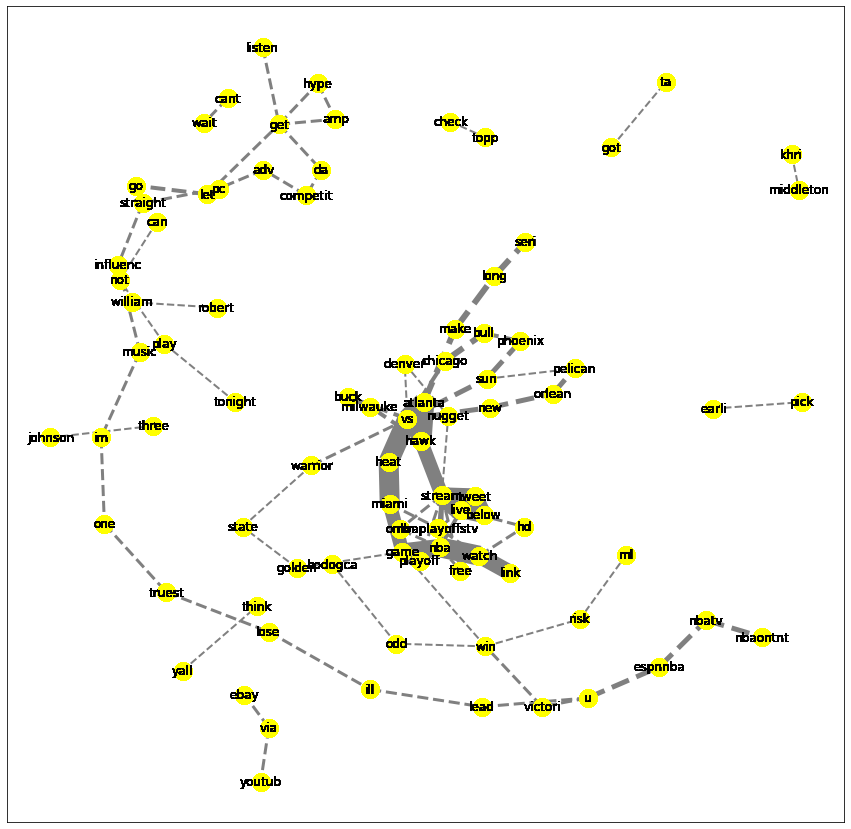

In [1201]:
plt.figure(3,figsize=(15,15)) 

G = nx.Graph()
elist = build_graph_tuples

G.add_weighted_edges_from(elist)
pos = nx.spring_layout(G, k=0.15, iterations=20)

for edge in G.edges(data = 'weight'):
    nx.draw_networkx(G, pos, with_labels = True, node_color = 'yellow', edge_color = 'grey', style = 'dashed',
                    edgelist =[edge], width = edge[2])



# for edge in g.edges(data='weight'):
#     nx.draw_networkx_edges(g, pos, edgelist=[edge], width=edge[2])

***Conclusions & Findings***

1. The thickness of the edges represents the frequency of the bigram. So, in our diagram, we see that most tweets contains bigrams of (playoffteam, mascot) - e.g. (milwauke, buck) , (atlanta, hawk), (phoenix, sun), (chicago, bull), (denver, nugget), (new orlean, pelican), (miami, heat), (golden state) & (state warriors). 


2. Right now the Phoenix Suns are facing the New Orlean Pelicans in the first round. I see a ***thick edge connecting sun to pelican*** which demonstrates this relationship. Similarly, the ***Heats is facing the Hawks*** and they're connected by the key word "vs". 


3. Looks like "vs" is one of the most frequent nodes (words in the tweets) which makes senses, since I searched for #nbaplayoff2022. 


4. I notice that (earli, pick) is connected, but off to the side. I assume this is in regards to the trades that happened right before the playoff (beginning of April). During trades, players can switch teams and picks are also pack of the package/discussion. This is a side conversation that's not about the current first round games. 


5. I also noticed that there's a bigram of (khri, middleton) and (william, rober). There two players are injuried, so they're part of different conversations. I also see that (ebay, via, youtub) are another bigram that's off to the side. These are not part of the main playoff conversations. 